# Introduction to Regression Analysis

Regression analysis is a powerful statistical method that allows us to examine the relationship between two or more variables of interest. At its core, regression helps us predict the value of a dependent variable based on the values of one or more independent variables. The simplest form of regression analysis is linear regression, which assumes a linear relationship between the dependent and independent variables.

For this tutorial, you will be using the powerful library `scikit-learn`(https://scikit-learn.org/stable/) 


## Linear Regression

Linear regression models the relationship between a dependent variable $y$ and one or more independent variables $X$ (possibly a vector) assuming the relationship is linear. The general form of a simple linear regression (simple meaning one independent variable, i.e. a vector of lenght one) is:

$$y = \beta_0 + \beta_1X + \varepsilon$$

where:
- $y$ is the dependent variable,
- $X$ is the independent variable,
- $\beta_0$ is the y-intercept,
- $\beta_1$ is the slope, and
- $\varepsilon$ represents the error term.

Usually, $\varepsilon$ is assumed to be a *normal random variable with mean 0*. This means that data will satisfy this model if the data points $(x_i, y_i)$ *almost* lay on a line, but there is some *noise* given by the error term $\varepsilon$.

More generally, a multilinear regression may take the form 

$$y=\beta_0 + \beta_1 X_1 + \ldots+ \beta_n X_n +\varepsilon$$

where $\varepsilon$ is the noise/error term as before. Note that this model looks like a plane in $\mathbb{R}^n$ with some noise/error given by the $\varepsilon$ term. 


## Theoretical Background of Simple Linear Regression

Simple linear regression aims to model the relationship between a scalar dependent variable $y$ and one or more independent variables $X$. The core idea is to find the linear relationship that best predicts $y$ from $X$. This is achieved by minimizing a loss function, which measures the discrepancy between the observed values and the values predicted by the linear model.

### Loss Function in Linear Regression
For a set of observed data points
$$(x_1, y_1), \ldots, (x_n,y_n)$$
we would like to find a choice of $\beta_0$ and $\beta_1$ that so that 

$$y = \beta_0 + \beta_1X + \epsilon$$

fits the data as closely as possible. We do this by defining a ''loss'' function to measure how good the fit is.

The most common loss function in linear regression is the Mean Squared Error (MSE), defined as:

$$ \text{MSE}(\beta_0,\beta_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where:
- $n$ is the number of observations,
- $y_i$ is the observed value,
- $\hat{y}_i=\beta_0+\beta_1x_i$ is the predicted value from the linear model.

How can we find the values of $\beta_0, \beta_1$ to minimize this function? Well, it is a function of two variables, so we can do as we learned in class! Take the derivative and set to 0: 
$$ \frac{\partial MSE}{\partial \beta_0}=0$$
$$ \frac{\partial MSE}{\partial \beta_1}=0$$

This is a system of two linear equations in two variables, so we can find $\hat{\beta}_0, \hat{\beta}_1$ that minimizes the MSE. 

Minimizing the MSE leads to finding the best-fitting line through the data, where "best-fitting" means the line that has the smallest average squared distance from the points in the dataset. This is sometimes called the ''line of best fit''.  

In more complicated regressions, the loss function can be minimized with gradient descent.

Fortunately, we can use Python to find the regression coefficients for us! 




<class 'list'>
Mt Housetop
39


IndexError: list index out of range

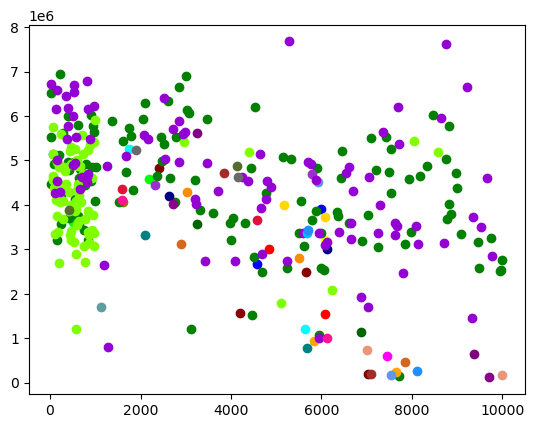

In [45]:
from scipy.stats import f_oneway
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression #THIS IS OUR REGRESSION PACKAGE
from sklearn.metrics import mean_squared_error, r2_score

devil_data = pd.read_csv('devil regression data.csv')
dftd_cells_csv = devil_data["dftd_cells"]
cell_reduction_csv = devil_data["cell_reduction"]
# print(dftd_cells_csv[0])

locations = devil_data["population"]
dftd_cells = {}
cell_reduction = {}

for i in range(len(dftd_cells_csv)):
    if locations[i] not in dftd_cells:
        dftd_cells[locations[i]] = [dftd_cells_csv[i]]
        cell_reduction[locations[i]] = [cell_reduction_csv[i]]
    else:
        dftd_cells[locations[i]].append(dftd_cells_csv[i])
        cell_reduction[locations[i]].append(cell_reduction_csv[i])

locations_set = list(set(locations))
print(type(locations_set))
print(locations_set[0])
print(len(locations_set))
colours = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF", "#800000", "#808000",  
"#008000", "#800080", "#008080", "#000080", "#FFA500", "#A52A2A", "#5F9EA0", "#7FFF00",  
"#D2691E", "#6495ED", "#DC143C", "#006400", "#8B008B", "#556B2F", "#FF8C00", "#9932CC",  
"#8B0000", "#E9967A", "#9400D3", "#FF1493", "#00BFFF", "#696969", "#1E90FF", "#FFD700"]
for i in range(len(locations_set)):
    x = np.array(dftd_cells[locations_set[i]])
    y = np.array(cell_reduction[locations_set[i]])
    model = LinearRegression()
    model.fit(x[:, np.newaxis], y)
    # y_pred = model.predict(x[:, np.newaxis])
    plt.scatter(x, y, color=colours[i], label='Data')
    # plt.plot(x, y_pred, color='blue', linewidth=3, label='Linear fit')


plt.xlabel('DFTD Cells')
plt.ylabel('Cell Reduction')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

# Print model parameters
# print("Coefficient (Slope):", model.coef_[0])
# print("Intercept:", model.intercept_)
# calculate and print R^2
# print("R^2:", r2_score(y, y_pred))


## Polynomial Regression

Polynomial regression extends linear regression by allowing the model to fit nonlinear relationships. This is achieved by adding polynomial terms to the model:

$$ y = \beta_0 + \beta_1X + \beta_2X^2 + ... + \beta_nX^n + \epsilon $$

Polynomial regression can model the curved relationships between the dependent and independent variables.

Technically, polynomial regression is a special case of linear regression! The idea is that if we are trying to fit a degree $n$ polynomial, we are actually specifying a plane in $\mathbb{R}^{n+1}$ for which the coordinates correspond to the coefficients of $1,x,x^2,\ldots, x^n$.

To implement this, we use a tool from sci-kit learn called ''PolynomialFeatures'' that converts given data into vectors (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). 


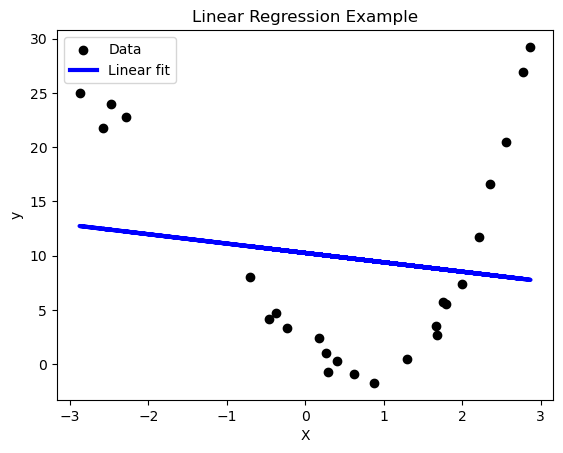

Coefficient (Slope): -0.8625618263911735
Intercept: 10.24963092292115


In [19]:
from sklearn.preprocessing import PolynomialFeatures

# Generate some data
np.random.seed(0)
X = 6 * np.random.rand(25) - 3
# Create some cubic data
y = X**3 + 3 * X**2 -7*X + 2 + np.random.randn(25)

# Let's try to fit a simple linear model and see what happens: 

# Fit a linear regression model
model = LinearRegression()
model.fit(X[:, np.newaxis], y)


# Make predictions
y_pred = model.predict(X[:, np.newaxis])

# Plot the results

# Plot the data
plt.scatter(X, y, color='black', label='Data')

#Plot the line of best fit
plt.plot(X, y_pred, color='blue', linewidth=3, label='Linear fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

# Print model parameters
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)



As you can see, the best linear fit is very bad. We could try something more complex! Let's try a cubic model (a VERY educated guess :p) 

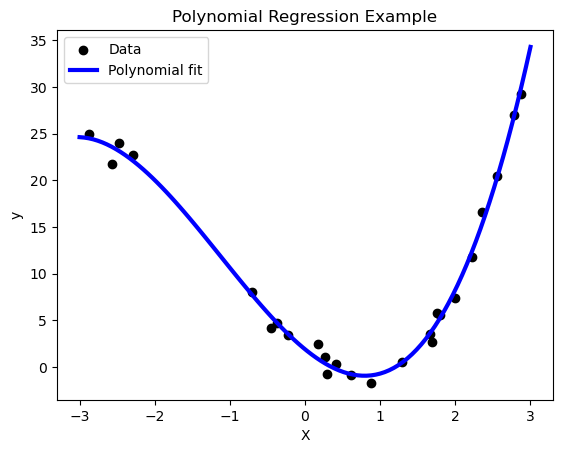

In [20]:
# Transform the features into polynomial features
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X[:,np.newaxis])

# Fit a linear regression model on the transformed features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Make predictions
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = poly_model.predict(X_new_poly)

# Plot the results
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_new, y_new, color='blue', linewidth=3, label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Example')
plt.legend()
plt.show()


This is a much better fit! Let's look at the predicted coefficients: 

In [32]:
#The predicted X, X^2, and X^3 coefficients
print(poly_model.coef_)
#The predicted intercept:
print(poly_model.intercept_)

[-6.57791949  3.06259146  0.90992301]
1.8813199669739848


So the fitted polynomial is 
$$1.88 - 6.58X + 3.06X^2 + 0.91X^3.$$

The actual polynomial (since we just made up the data) is 
$$2 - 7X + 3X^2 + X^3,$$
and so it looks like the prediction is pretty close. 

We can use this model to predict the value of our function at a new point: 


In [44]:
# What is the value of the predicted function at X=10? X=11? X=12? 
new_values=np.array([10,11,12])
poly_model.predict(poly_features.fit_transform(new_values[:,np.newaxis]))

array([366.42369313, 223.36387681, -79.44541369])

What happens if we didn't know in advance what the degree is? 

We could just try to fit a more complex model: 

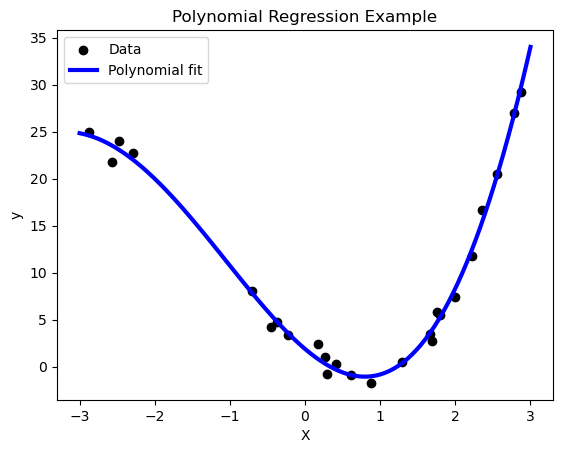

In [34]:
# Let's fit a degree 5 polynomial to the same data: 

# Transform the features into polynomial features
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X[:,np.newaxis])

# Fit a linear regression model on the transformed features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Make predictions
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = poly_model.predict(X_new_poly)

# Plot the results
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_new, y_new, color='blue', linewidth=3, label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Example')
plt.legend()
plt.show()

The fitted polynomial looks quite similar. Let's look at the coefficients: 

In [35]:
#The predicted X, X^2, and X^3 coefficients
print(poly_model.coef_)
#The predicted intercept:
print(poly_model.intercept_)

[-6.77870443e+00  3.07356036e+00  1.00029658e+00 -1.68951234e-03
 -8.58434786e-03]
1.888028928393397


Notice that the degree 4 and 5 coefficients are very close to 0, so we get a very similar model. 


### Overfitting

We may be tempted to fit as complex a model as possible. For example, we have 25 data points. What if we try to fit a model of degree 24? (recall that two points specify a line, three points specify a parabola, four points specify a cubic,...)

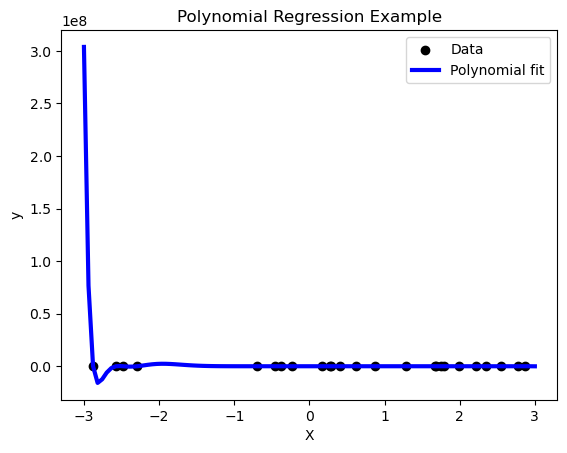

In [46]:
# Let's fit a degree 24 polynomial to the same data: 

# Transform the features into polynomial features
poly_features = PolynomialFeatures(degree=24, include_bias=False)
X_poly = poly_features.fit_transform(X[:,np.newaxis])

# Fit a linear regression model on the transformed features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Make predictions
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = poly_model.predict(X_new_poly)

# Plot the results
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_new, y_new, color='blue', linewidth=3, label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Example')
plt.legend()
plt.show()

So we have created a polynomial that goes through all the points, but have very little predictive value. In general, you should always choose a model that is as simple as possible, but no simpler! 


## BONUS: Logistic Regression

Logistic regression is used when the dependent variable is categorical. It models the probability that each input belongs to a particular category. The logistic function (sigmoid function) transforms its output to range between 0 and 1, making it suitable for modeling probability.

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

where $z = \beta_0 + \beta_1X$.


Below, we simulate some data that clusters into two types/categories, which we label 0 and 1. We want to do a logistic regression that predicts the category. 

(More general logistic regression can be applied to data with more than just two categories). 


   Feature 1  Feature 2  Target
0  -1.049486   0.878644       1
1   0.878099   0.895511       0
2   0.959288   1.039673       0
3  -1.180134   1.120622       1
4  -0.907318   1.060409       1


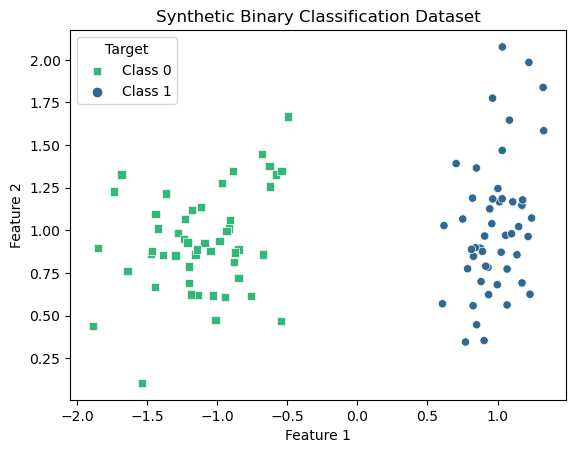

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, weights=[0.5, 0.5], random_state=1)

# Convert to a DataFrame for easier visualization
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Display the first few rows of the dataset
print(df.head())

# Visualize the dataset
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Target', style='Target', palette='viridis', markers=['o', 's'])
plt.title('Synthetic Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Target', labels=['Class 0', 'Class 1'])
plt.show()


In [57]:
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression(solver='liblinear')  # Using 'liblinear' for binary classification
log_reg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = log_reg.predict(X_test)


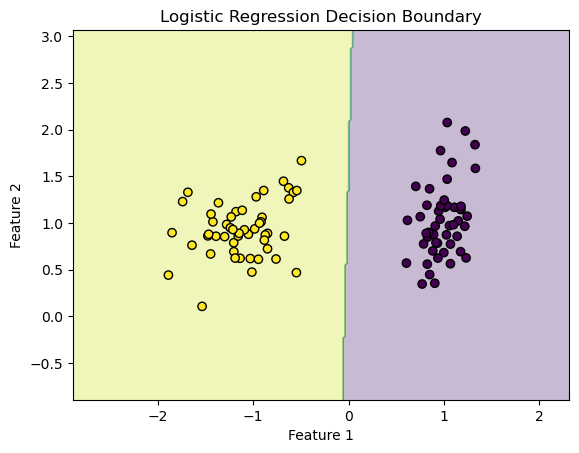

In [58]:
# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict classifications for every point in the mesh
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Generate the plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Evaluating Regression Models

Evaluating the performance and appropriateness of regression models is crucial in statistical modeling and machine learning. Key metrics and tests used in this evaluation process include \(R^2\) (R-squared), t-tests for coefficients, and Mean Squared Error (MSE). Understanding these metrics helps in determining how well a model fits the data, the significance of predictors, and potential issues like overfitting.

## R-squared (\(R^2\))

\(R^2\) measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides a gauge of the model's explanatory power:

- \(R^2 = 1\) indicates a perfect fit, where the model explains all the variability of the response data around its mean.
- \(R^2 = 0\) suggests that the model explains none of the variability of the response data around its mean.

## T-tests for Regression Coefficients

T-tests assess the statistical significance of each predictor by testing the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) rejects the null hypothesis, indicating a statistically significant relationship between the predictor and the dependent variable.

## Mean Squared Error (MSE)

MSE quantifies the average squared difference between the observed actual outcomes and the outcomes predicted by the model. It's a measure of the model's accuracy:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 $$

Lower MSE values indicate a model that predicts more closely to the actual data, while higher values suggest a model with larger prediction errors.

## Risks of Over-relying on \(R^2\)

While \(R^2\) is a useful metric for assessing model fit, it has limitations:
- **Overfitting:** \(R^2\) can increase with the addition of more predictors, potentially leading to overfit models that perform well on training data but poorly on unseen data.
- **Adjusted \(R^2\):** To counteract the potential for overfitting, Adjusted \(R^2\) accounts for the number of predictors in the model, providing a more accurate measure of model performance.


### Example: Linear Regression Model Evaluation

We'll demonstrate model evaluation using `scikit-learn` by fitting a linear regression model and assessing its performance using \(R^2\), MSE, and visualizing the fit to understand the model's accuracy and potential overfitting.


R-squared: 0.85
Mean Squared Error: 3.67


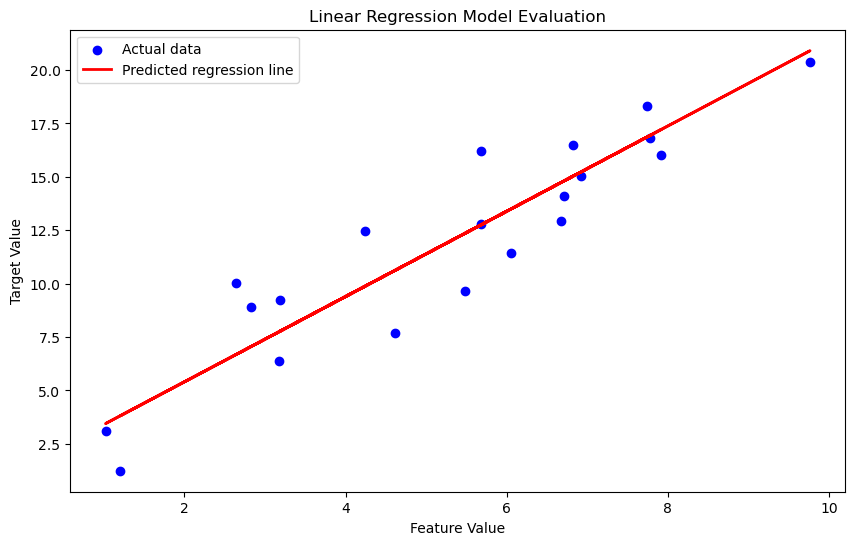

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 data points in one feature
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2  # Linear relationship with noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")


residuals = y_test - y_pred


# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted regression line')
plt.title('Linear Regression Model Evaluation')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend()
plt.show()


## Polynomial Regression Example

Polynomial regression extends linear regression to model non-linear relationships between the independent variables and the dependent variable. By adding powers of the original features as new features, we can fit a polynomial curve to the data. Let's see how this works with `scikit-learn` and evaluate the model using \(R^2\) and MSE.


Polynomial Regression R-squared: 0.97
Mean Squared Error: 15.90


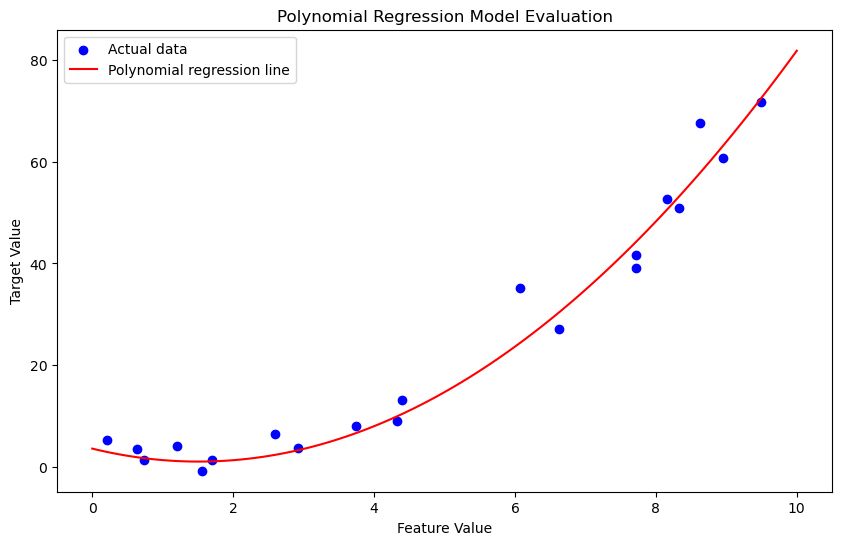

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 data points
y = 1 - 2 * X.squeeze() + X.squeeze()**2 + np.random.randn(100) * 5  # Quadratic relationship with noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial regression
degree = 2
polyreg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model.fit(X_train, y_train)

# Predictions
y_poly_pred = polyreg_model.predict(X_test)

# Model evaluation
print(f"Polynomial Regression R-squared: {r2_score(y_test, y_poly_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_poly_pred):.2f}")

# Visualization
X_fit = np.linspace(0, 10, 100).reshape(-1, 1)
y_fit = polyreg_model.predict(X_fit)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_fit, y_fit, color='red', label='Polynomial regression line')
plt.title('Polynomial Regression Model Evaluation')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend()
plt.show()


## Evaluating Logistic Regression Models

Evaluating logistic regression involves different metrics, as it's used for classification problems. Key metrics include:

- **Accuracy:** The proportion of correctly predicted observations to the total observations.
- **Precision and Recall:** Precision measures the proportion of correctly predicted positive observations to the total predicted positives, while recall measures the proportion of correctly predicted positive observations to all actual positives.
- **F1 Score:** The weighted average of Precision and Recall, useful when there's an uneven class distribution.
- **ROC-AUC:** The Receiver Operating Characteristic curve (ROC) is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test. AUC represents the Area Under the ROC Curve, measuring the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

Each of these metrics provides different insights into the performance of a logistic regression model, making it crucial to consider them collectively when evaluating model performance.


R-squared: 1.00


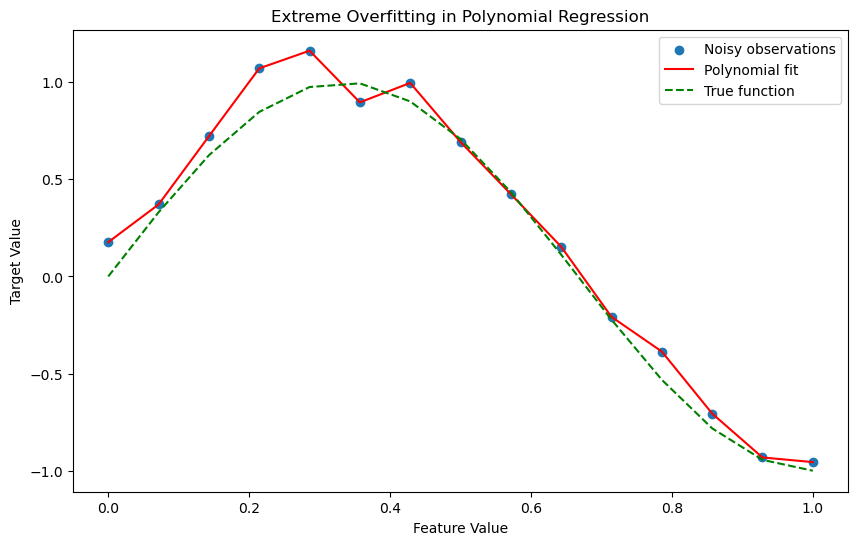

In [7]:
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 1, 15)  # 15 data points
y = np.sin(X * 1.5 * np.pi )  # Sinusoidal relationship
y_noisy = y + np.random.normal(scale=0.1, size=y.shape)  # Adding noise

# Fit a polynomial regression model
degree = 14  # High degree for overfitting
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X[:, None])
model = LinearRegression()
model.fit(X_poly, y_noisy)

# Predictions
y_pred = model.predict(X_poly)

# Evaluation
r2 = r2_score(y_noisy, y_pred)
print(f"R-squared: {r2:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y_noisy, label='Noisy observations')
plt.plot(X, y_pred, label='Polynomial fit', color='red')
plt.plot(X, np.sin(X * 1.5 * np.pi), label='True function', color='green', linestyle='--')
plt.title('Extreme Overfitting in Polynomial Regression')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend()
plt.show()


## Analysis of Overfitting

In this example, fitting a polynomial regression model with a degree equal to the number of data points minus one (degree=14 for 15 data points) results in an \(R^2\) score of 1. This indicates that the model perfectly fits the noisy training data. However, the red curve (model prediction) significantly deviates from the green dashed line (true function) in many areas, showcasing overfitting.

Despite the perfect \(R^2\) score, this model is likely to perform poorly on unseen data due to its extreme sensitivity to the noise in the training data. It exemplifies the risk of using a high-degree polynomial without regularization or considering the model's complexity and generalizability. 

This scenario underscores the importance of using additional evaluation metrics and validation techniques, such as cross-validation, to ensure that models generalize well to new data.


## Final Remarks

- When presented with real world data, we must be prepared to experiment to find an appropriately fitting model.
- No model will fit perfectly, unless it is overly complicated. 
- A good model should be "as simple as possible, but no simpler!"
- Sometimes, it will be necessary to preprocess/transform your data before you fit it. For example some data may only be linear after taking the log of all the data (a log-linear model). These are things you must be prepared to explore with plotting and visualization. 
